In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
## Finding the no of row and column in our data set
df.shape

(847, 2)

In [4]:
## Doing EDA(Exploratory Data analysis) so we have do see different types of graph
print(f"Date range of gold price available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold price available from - 1950-01 to 2020-07


In [5]:
date = pd.date_range (start = '1/1/1950' , end='8/1/2020' , freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [6]:
## Change the Date column to month
df['Month'] = date ## put all the value of new date list to the new column Month
df.drop('Date' , axis =1 , inplace = True)
df = df.set_index('Month')
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


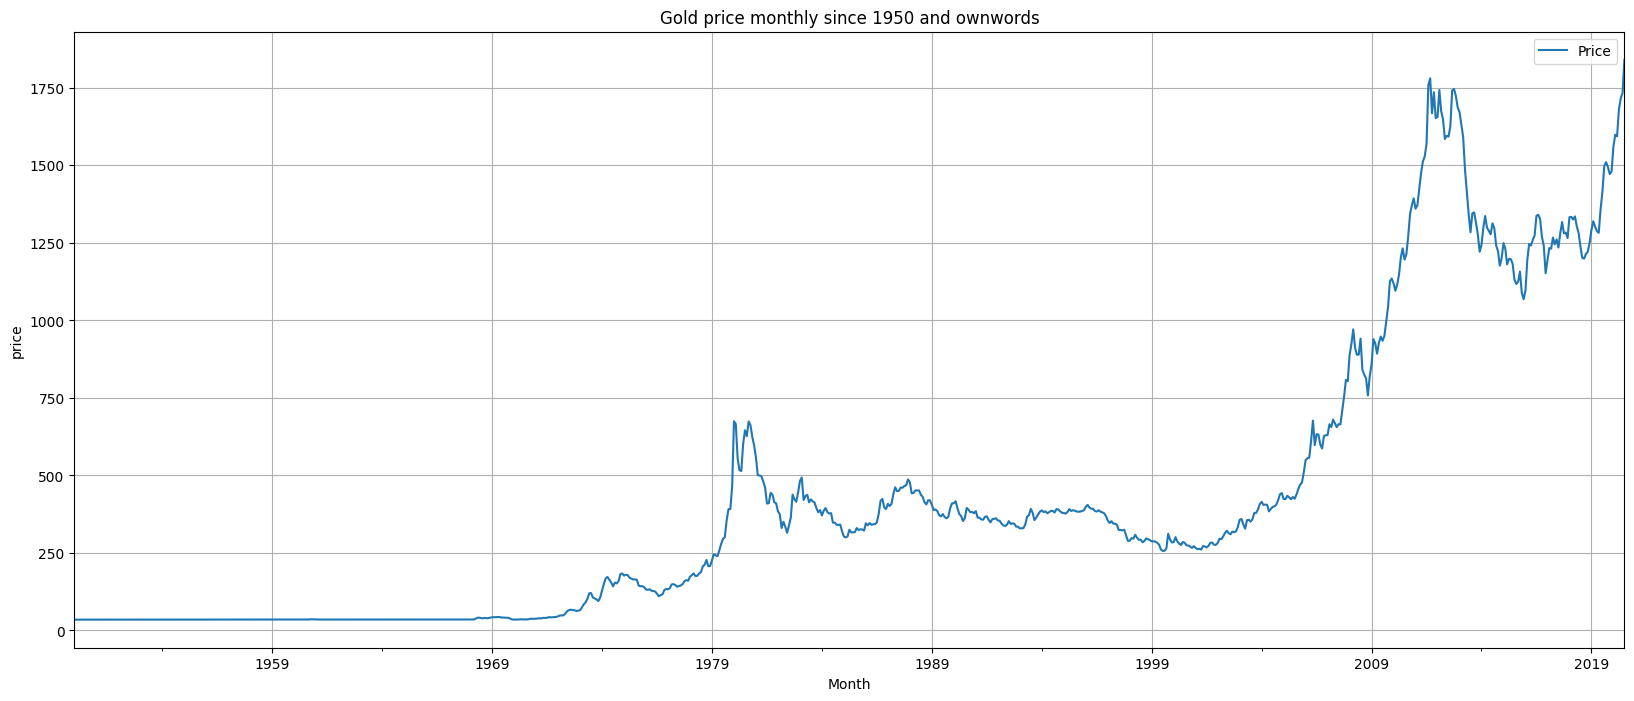

In [7]:
## Making the diferrent graphs

df.plot(figsize=(20,8))
plt.title("Gold price monthly since 1950 and ownwords")
plt.xlabel("Month")
plt.ylabel("price")
plt.grid();

In [8]:
## another graph
round(df.describe(),3) ## 3 is for 3 digit after the decimal

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


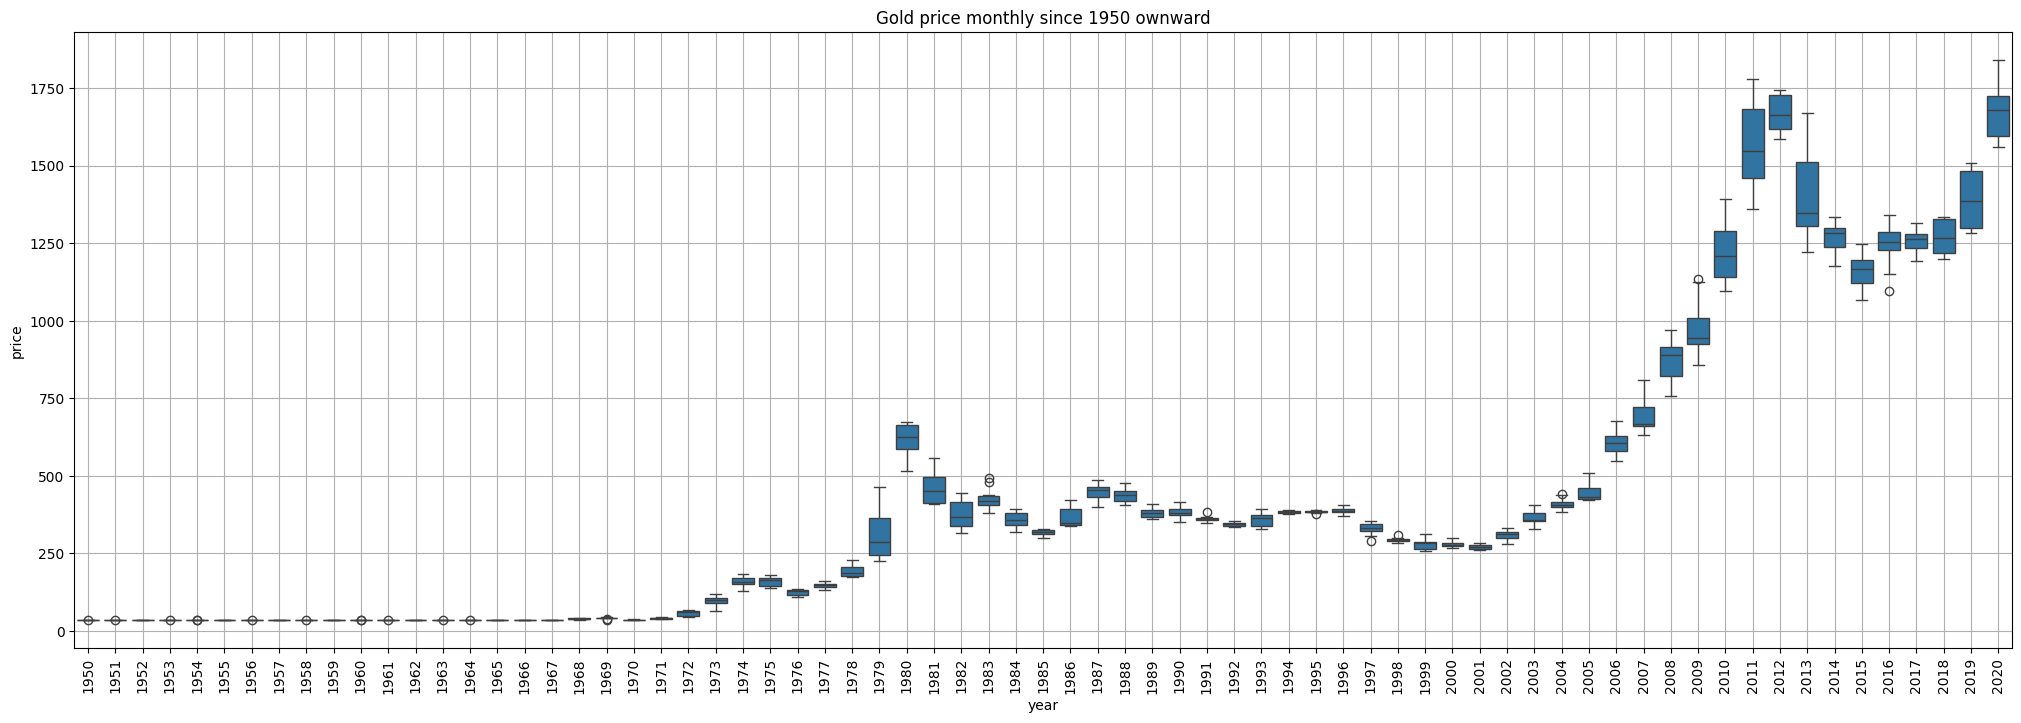

In [9]:
## visual analyysis
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year , y= df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 ownward')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

## this will show how our price is decreasing and increasing every year

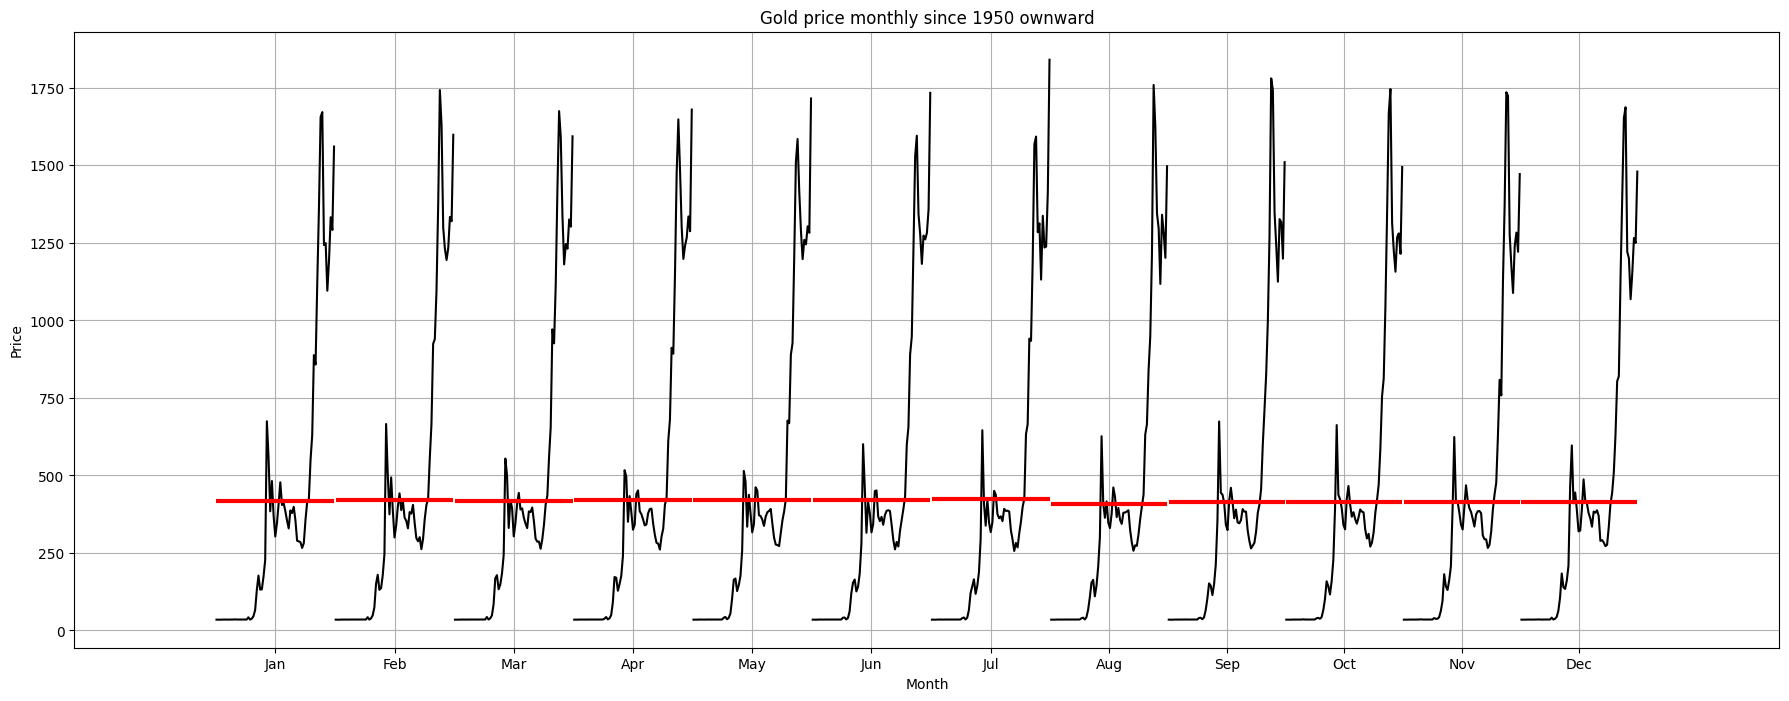

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df , ylabel = 'Gold price' , ax=ax)
plt.title('Gold price monthly since 1950 ownward')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid();

## another graph showing the change in price month wise every year

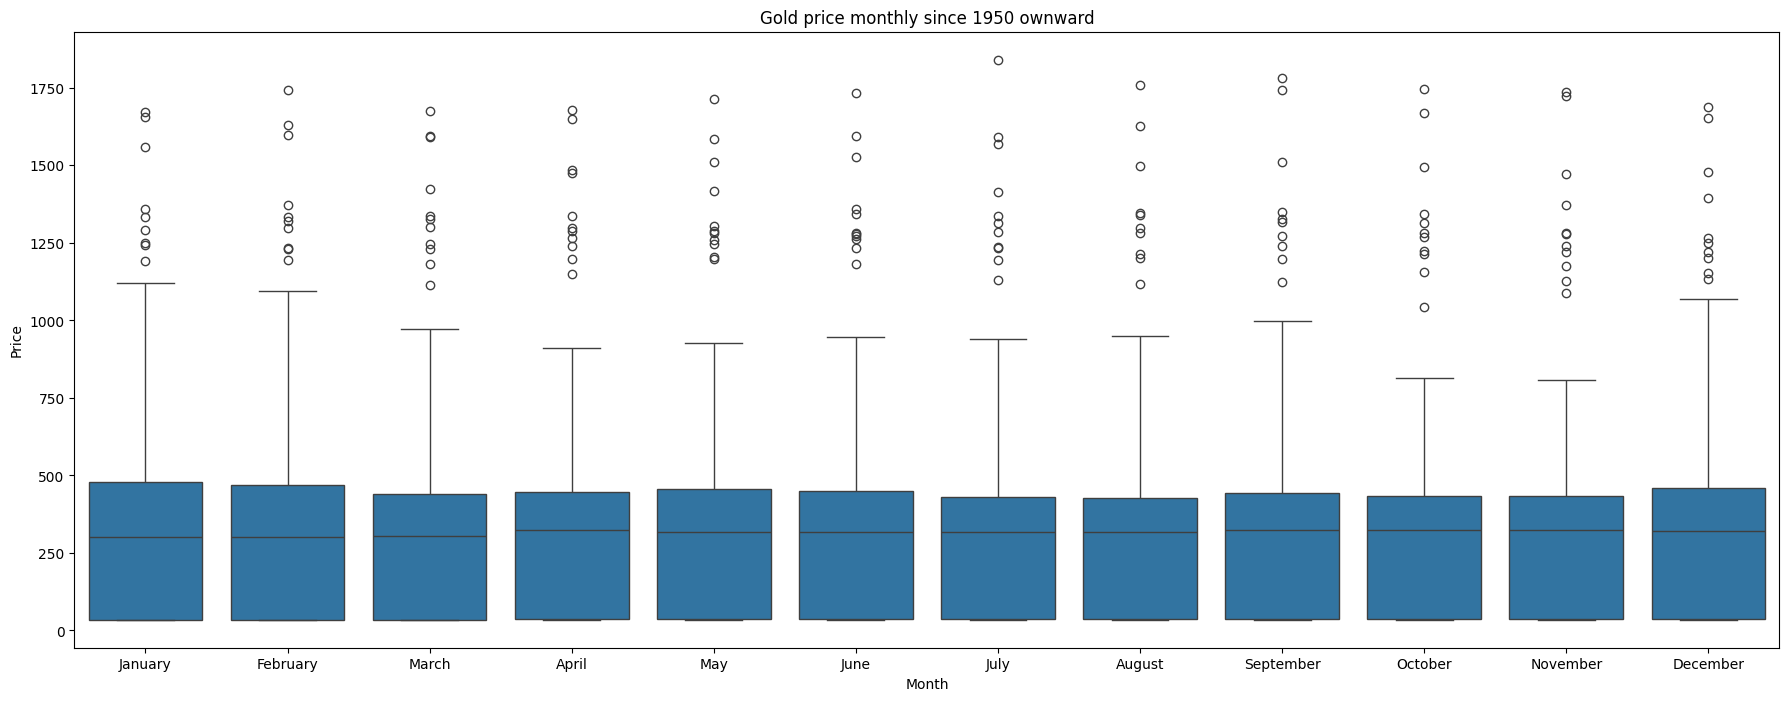

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name() , y = df.values[:, 0], ax=ax)
plt.title('Gold price monthly since 1950 ownward')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show();

## Another type of boxplot graph

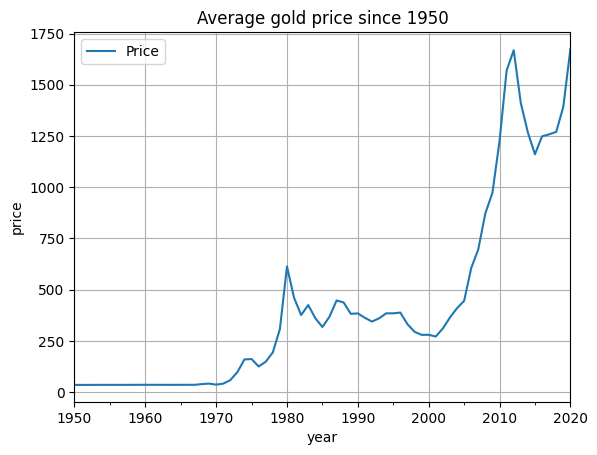

In [12]:
### Average gold price since 1950

df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Average gold price since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

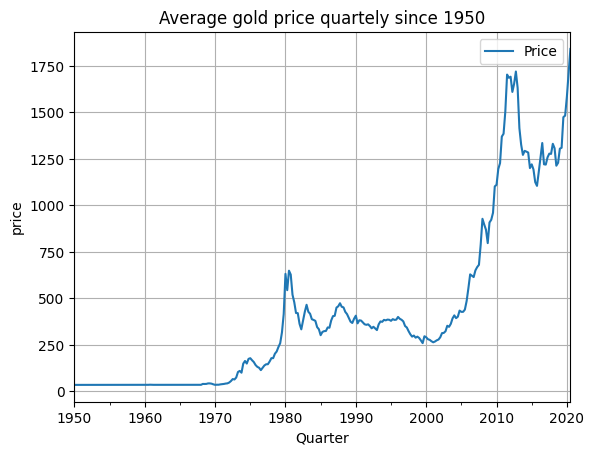

In [13]:
## Average gold price per quatertly predication

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Average gold price quartely since 1950")
plt.xlabel('Quarter')
plt.ylabel('price')
plt.grid();

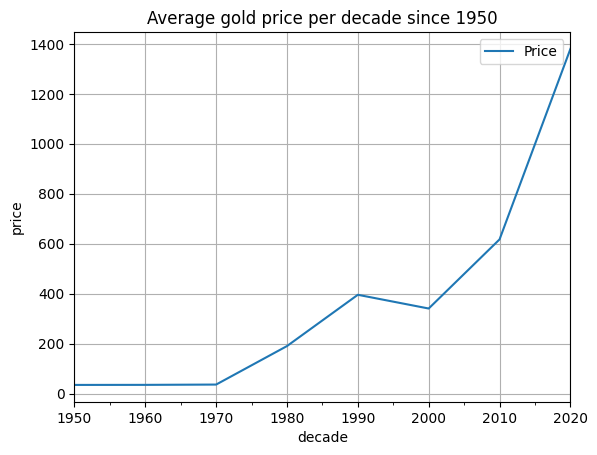

In [14]:
## Average gold price per decade

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Average gold price per decade since 1950")
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

                                                        ## CV VALUES
Now find out the value of CV(Coefficient of Variation) in price. It is a statical measure of relative despersion of the data point in a data series around the mean and in finance the cofficient of variation allows investor to determine how much mortality or risk is assumed comparison of the amount.
Like amount to the return to the investors. The lower the ratio of the standard deviation to mean return the better risk return trade-off.

Now find the CV values for the gold price each year

In [15]:
df_1 = df.groupby(df.index.year).mean().rename(columns= {'Price' : 'Mean'}) ##Grouping the rows on the basis of year in new data frame and also chnaging name of column price to mean
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price' : 'Std'}), left_index= True , right_index= True)
df_1['cov_pct']= ((df_1["Std"] / df_1["Mean"]) * 100).round(2)
df_1.head()

,Mean,Std,cov_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


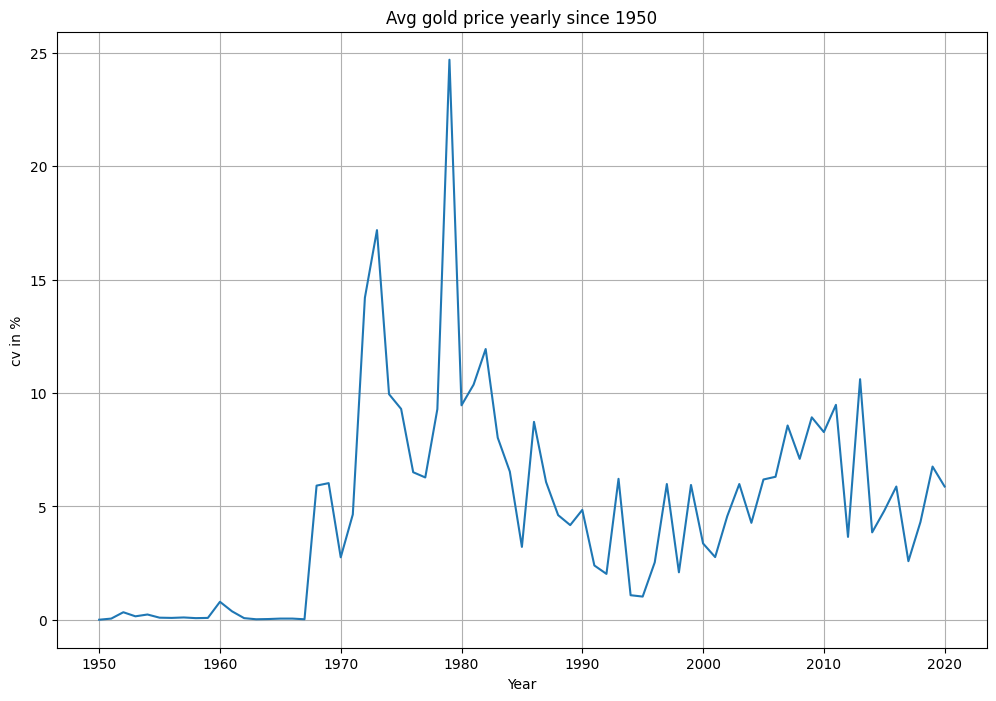

In [16]:
## Average gold price 

fig, ax = plt.subplots(figsize= (12,8))
df_1['cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

In 1978 the cv percentage is high approx 25% which make our asset more risky and in year 2020 our cv value is approx 5% which makes our asset variable a good investment.

In [17]:
## Now we will train our model for forecasting And we are using data till 2015 for training
## We will also test our model with the data greater then year 2015

train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [18]:
print(train.shape) ## no of row and col present in train data set
print(test.shape)  ## no of row and col present in test data set

(792, 1)
(55, 1)


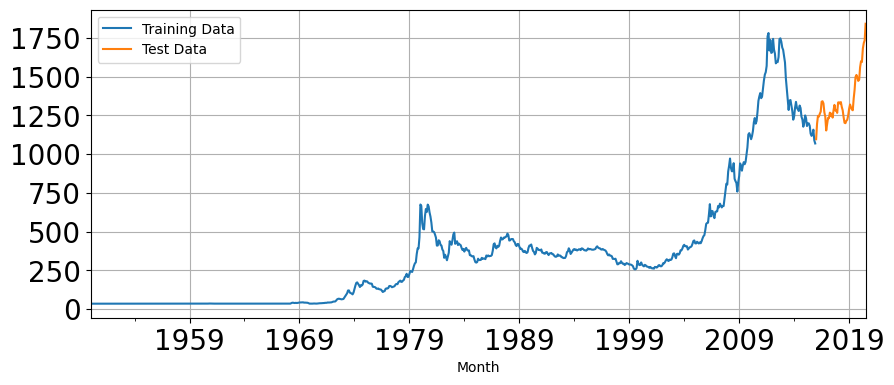

In [19]:
train["Price"].plot(figsize=(10,4), fontsize = 20)
test["Price"].plot(figsize=(10,4), fontsize = 20)
plt.grid()
plt.legend(['Training Data' , 'Test Data']) ## In the corner of our graph their is indecating that the blue for training and orange for test this is known as legend
plt.show()

## Model Formation (We have two model one is Linear regression and the other one is Name base)

In [20]:
## Linear Regression

train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range (len(test))]
len(train_time), len(test_time)

(792, 55)

In [21]:
##LR stand for linear regression
LR_train = train.copy() 
LR_test = test.copy()

In [22]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [23]:
## Definning the linear regression
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train["Price"].values)

LinearRegression()

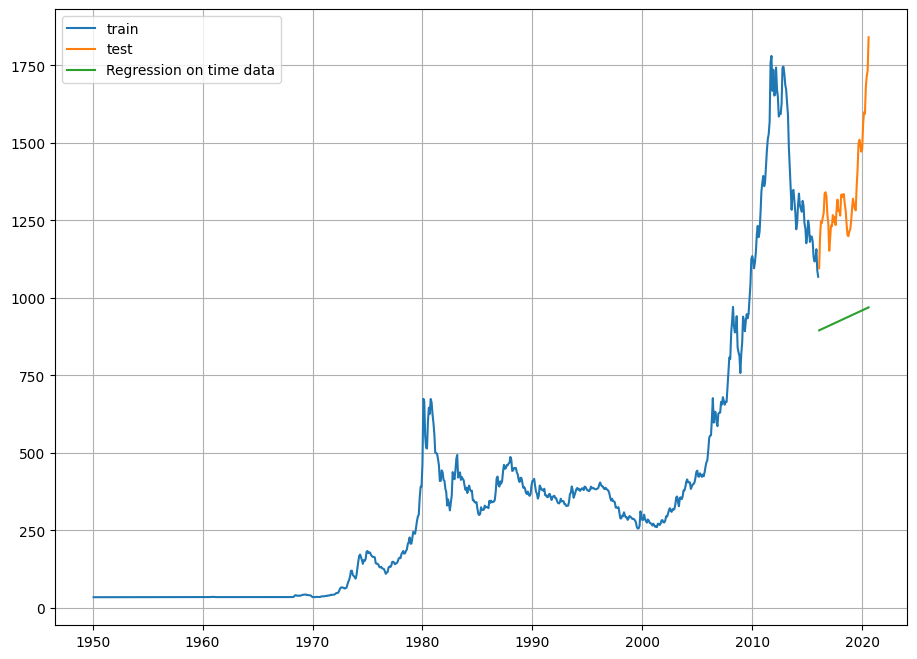

In [24]:
## Now see the graph
test_predictions_model1 =lr.predict(LR_test[["time"]])
LR_test['Forecast'] = test_predictions_model1

plt.figure(figsize = (11,8))
plt.plot(train['Price'], label= 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['Forecast'], label = 'Regression on time data')
plt.legend(loc = 'best')
plt.grid();

## We will now find the value of MAPE(Measure of Preadiction Accuracy of a Forecasting method in Statical model)

In [25]:
def mape(actual , prediction):
    return round((np.mean(abs(actual - prediction) / actual))*100 , 2)

In [26]:
mape_model1_test = mape(test['Price'].values , test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test ), "%")

MAPE is 29.760 %


In [27]:
result = pd.DataFrame({'Test mape (%)' : [mape_model1_test ]} , index=["RegressionOnTime"])
result

,Test mape (%)
RegressionOnTime,29.76


In [28]:
## Now naive model

Naive_train = train.copy() 
Naive_test = test.copy()

In [29]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

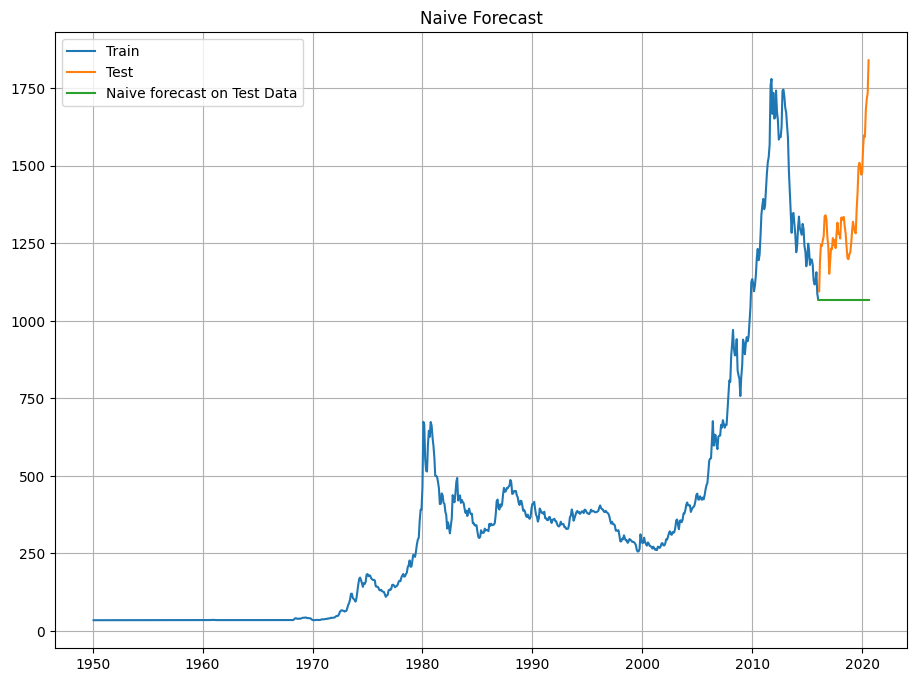

In [30]:
plt.figure(figsize = (11,8))
plt.plot(Naive_train['Price'], label= 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive forecast on Test Data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();

In [31]:
mape_model2_test = mape(test['Price'].values , Naive_test['naive'].values)
print("For Naive forecast on Test Data, MAPE is %3.3f"%(mape_model2_test ), "%")

For Naive forecast on Test Data, MAPE is 19.380 %


In [32]:
resultDF_2 = pd.DataFrame({'Test mape (%)' : [mape_model2_test ]} , index=["NaiveModel"])
results = pd.concat([result, resultDF_2])
results

,Test mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


In [33]:
## Now we will create our final model(final forecasting)

# Fit the ExponentialSmoothing model
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6
)

In [34]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model )

MAPE: 17.24


## We are getting the prediction for the same number of time stamps at the same time on the test data

In [35]:
 ##Generate predictions for the test data
predictions = final_model.predict(start=len(df), end=len(df) + len(test) - 1)

## Now we will compute 95% of the confidence interval for the predicated value

In [38]:
## Created the Data frame for the predicated data 
# Create the pred_df DataFrame
pred_df = pd.DataFrame(
    {
        'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
        'prediction': predictions,
        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1),
    }
)

# Print the first few rows of the DataFrame
pred_df.head()
pred_df.tail()

,lower_CI,prediction,upper_CI
2024-10-31,1939.829757,2047.980729,2156.131701
2024-11-30,1878.020067,1986.171039,2094.322011
2024-12-31,1860.588425,1968.739397,2076.890370
2025-01-31,1915.678484,2023.829456,2131.980428
2025-02-28,1946.613128,2054.764100,2162.915072


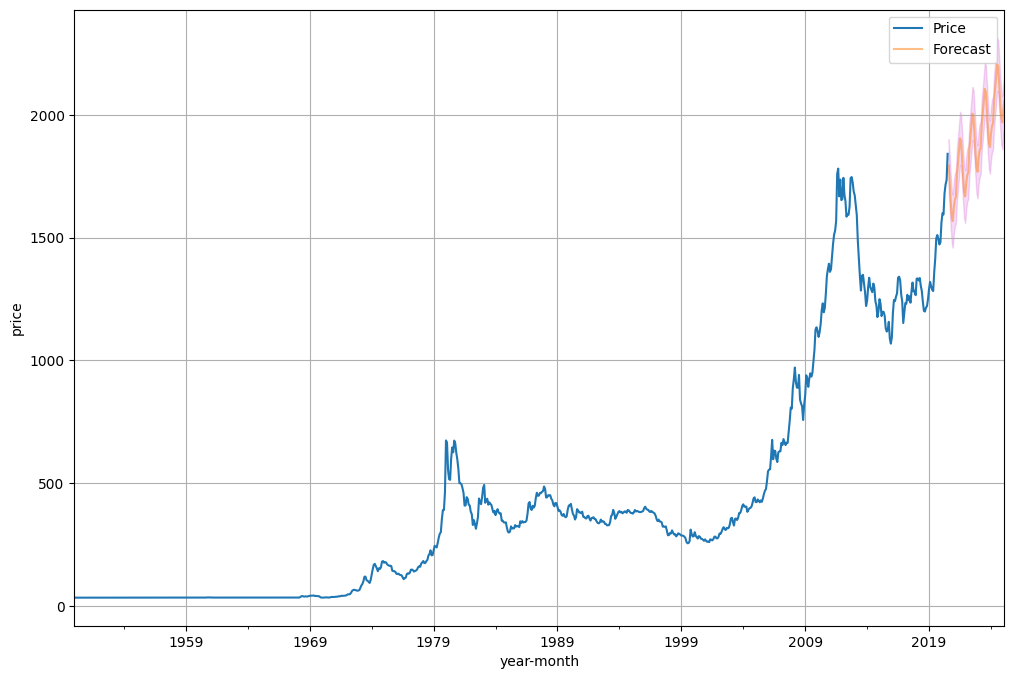

In [37]:
axis = df.plot(label = 'Actual' , figsize = (12,8))
pred_df['prediction'].plot(ax= axis , label = 'Forecast' , alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm' , alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()